In [346]:
import pandas as pd
import numpy as np

In [374]:
korea = pd.read_excel('./source/전국 카토그램.xlsx')
korea.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


## 위 엑셀의 각 칸 별 x,y좌표가 필요하다
- stack() : column index를 raw index로 바꾸어서 세로로 붙임 <br>
원래 행 인덱스가 있었다면 원래 행을 구분하여 붙어서 multi index가 return 
- ubstack() : raw index를 column index로 바꾸어서 가로로 붙임 <br>
원래 열 인덱스가 있었다면 원래 행을 구분하여 붙어서 multi columns가 return 



In [375]:
# 원래 행 인덱스가 있었다면 원래 행을 구분하여 붙어서 multi index가 return되기 때문에 0층은 y좌표(원래 행), 1층은 x좌표(원래 열)로 생각할 수 있다.
korea_stacked = pd.DataFrame(korea.stack())
korea_stacked.head()

0
0 7       철원
  8       화천
  9       양구
  10  고성(강원)
1 3       양주

In [376]:
korea_stacked.reset_index(inplace=True)
korea_stacked.head()
len(korea_stacked[0])

250

In [377]:
korea_stacked.rename(columns={
    'level_0':'y',
    'level_1':'x',
    0:'ID'
},inplace=True)
draw_korea = korea_stacked.copy()
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


## 경계선(엑셀 일일히)
- 중첩 리스트 꼴

In [378]:
# with open('./source/BORDER_LINES.txt',encoding='utf8') as file:
#     list_file = file.readlines()
#     BORDER_LINES = [line.rstrip('\n') for line in list_file] 
# BORDER_LINES    

In [379]:
BORDER_LINES = [
    [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), (11,4), (11,3)], # 경기
    [(8,10), (8,11), (6,11), (6,12)], # 강원
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충북
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전북
    [(13,5), (13,6), (16,6)], # 대전
    [(13,5), (14,5)], #세종
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전남
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충남
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경북
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]



In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [10, 10]

## df.iterrows()
- 행과 열 값 꺼내기. 마치 dict.items() 처럼

In [381]:
for i, r in draw_korea.iterrows():
    print(f'i:{i},r:{r}, r_type: {type(r)},{r[0]},{r[1]},{r[2]}')
    if i == 3:
        break

i:0,r:y      0
x      7
ID    철원
Name: 0, dtype: object, r_type: <class 'pandas.core.series.Series'>,0,7,철원
i:1,r:y      0
x      8
ID    화천
Name: 1, dtype: object, r_type: <class 'pandas.core.series.Series'>,0,8,화천
i:2,r:y      0
x      9
ID    양구
Name: 2, dtype: object, r_type: <class 'pandas.core.series.Series'>,0,9,양구
i:3,r:y          0
x         10
ID    고성(강원)
Name: 3, dtype: object, r_type: <class 'pandas.core.series.Series'>,0,10,고성(강원)


In [382]:
for idx, row in draw_korea.iterrows():
    print(idx, 
     row[1], # x좌표
     row[0], # y좌표
     row[2], # 지역 이름
     )
    if idx == 5:
         break

0 7 0 철원
1 8 0 화천
2 9 0 양구
3 10 0 고성(강원)
4 3 1 양주
5 4 1 동두천


- splitlines: \n로 구분되어 있는 문자열을 나눠서 리스트로 리턴 <br>
split('\n')와 같다.

In [383]:
a = '가나다라\n마바'
a.splitlines()

['가나다라', '마바']

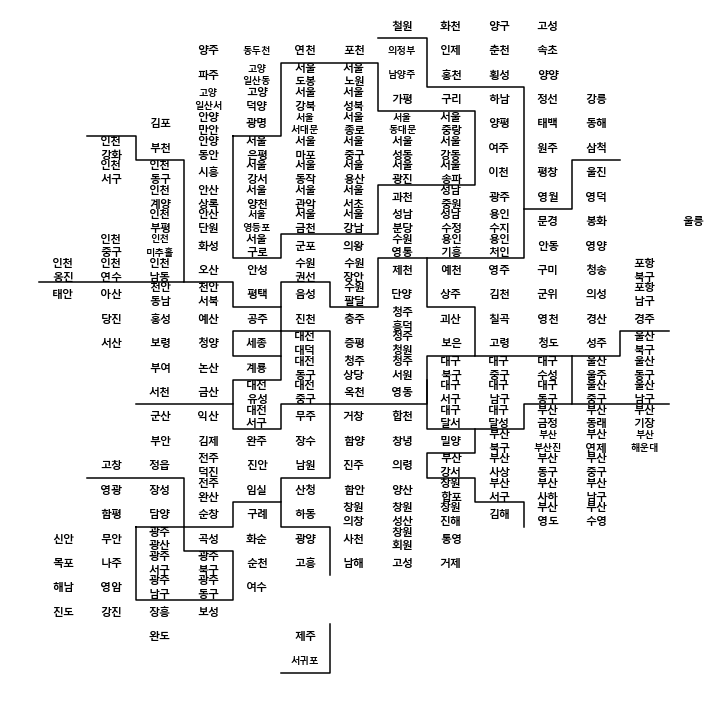

In [384]:
# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row[2].split())==2:
        dispname = '{}\n{}'.format(row[2].split()[0], row[2].split()[1])
    elif row[2][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row[2]

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    # 주석(박스 안에 글자) 써 넣기.    
    plt.annotate(dispname, (row[1]+0.5, row[0]+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path) 
    # zip Return값: [(튜플),(튜플),(튜플)...]
    # zip(*[(튜플),(튜플),(튜플)...]) Return값: [ [튜플 0번째 원소들], [튜플 1번째 원소들], ... ]
    # 다시 말해 y좌표의 리스트, x좌표의 리스트를 Return
    plt.plot(xs, ys, c='black', lw=1.5)

# y축을 반대로, 즉 y축 값이 작을 수록 그래프 위에 그려지도록
plt.gca().invert_yaxis()
# x축, y축이 동일한 비율을 갖는 정사각형으로 그리기
# plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

## 시군구 인구수 pop DataFrame과 카토그램을 위한 draw_korea DF에서 일반 행정구를 가진 시(성남, 수원) 행을 삭제
- set(집합) 클래스의 차집합(-) 메소드
- df.drop(df\[ 팬시인덱싱(조건) \].index ) <br>
다시 말하면 drop() 안에는 df의 index가 들어와야 함

In [385]:
pop = pd.read_csv('./result/소멸 위기 지역.csv', sep=',', encoding='utf8')
del pop['Unnamed: 0']
pop

,광역시도,시도,20~39세계,20~39세여자,65세 이상계,인구수계,인구수남자,인구수여자,소멸 비율,소멸 위기 지역,ID
0,강원,강릉시,46008,20993,40497,203057,101154,101903,0.518384,False,강릉
1,강원,고성군,4006,1699,7005,23621,11933,11688,0.242541,True,고성(강원)
2,강원,동해시,16311,7510,16152,83888,42093,41795,0.464958,True,동해
3,강원,삼척시,12428,5280,14953,61833,31630,30203,0.353106,True,삼척
4,강원,속초시,15928,7411,14010,76302,37488,38814,0.528979,False,속초
...,...,...,...,...,...,...,...,...,...,...,...
245,충북,증평군,9059,4087,5720,35464,18166,17298,0.714510,False,증평
246,충북,진천군,18978,8623,12143,76197,39378,36819,0.710121,False,진천
247,충북,충주시,47183,21483,37574,201057,101311,99746,0.571752,False,충주
248,포항시,남구,49270,22812,35726,221143,112611,108532,0.638527,False,포항 남구


In [386]:
# unique로 하면 인천 서구, 부산 서구처럼 겹치는 게 있어서 제대로 안 나온다
set(pop['ID']) - set(draw_korea['ID'])

set()

In [387]:
len(pop['ID'].unique())

250

In [388]:
pop[pop['ID']=='고성(강원)'].index

Int64Index([1], dtype='int64')

In [389]:
""" tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)

print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
# 겹치는 거 더 이상 없음 """

" tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))\n\nfor tmp in tmp_list:\n    pop = pop.drop(pop[pop['ID']==tmp].index)\n\nprint(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))\n# 겹치는 거 더 이상 없음 "

## 행이 삭제되었으니 좌표, ID DF draw_korea을 인구 DF pop과 합친다.

In [392]:
pop = pd.merge(pop, draw_korea, how='left',  on = 'ID')
pop.head(3)

,광역시도,시도,20~39세계,20~39세여자,65세 이상계,인구수계,인구수남자,인구수여자,소멸 비율,소멸 위기 지역,ID,y_x,x_x,y_y,x_y,y,x
0,강원,강릉시,46008,20993,40497,203057,101154,101903,0.518384,False,강릉,3,11,3,11,3,11
1,강원,고성군,4006,1699,7005,23621,11933,11688,0.242541,True,고성(강원),0,10,0,10,0,10
2,강원,동해시,16311,7510,16152,83888,42093,41795,0.464958,True,동해,4,11,4,11,4,11


In [398]:
len(pop['ID'])

250

In [399]:
len(draw_korea['ID'])

250

In [401]:
pop['ID'] == draw_korea['ID']

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Name: ID, Length: 250, dtype: bool

# 함수

In [396]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 띄어쓰기를 \n로 바꾸기.
        if len(row['ID'].split())==2:
            dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

# 인구 현황 및 인구 소멸 지역 확인

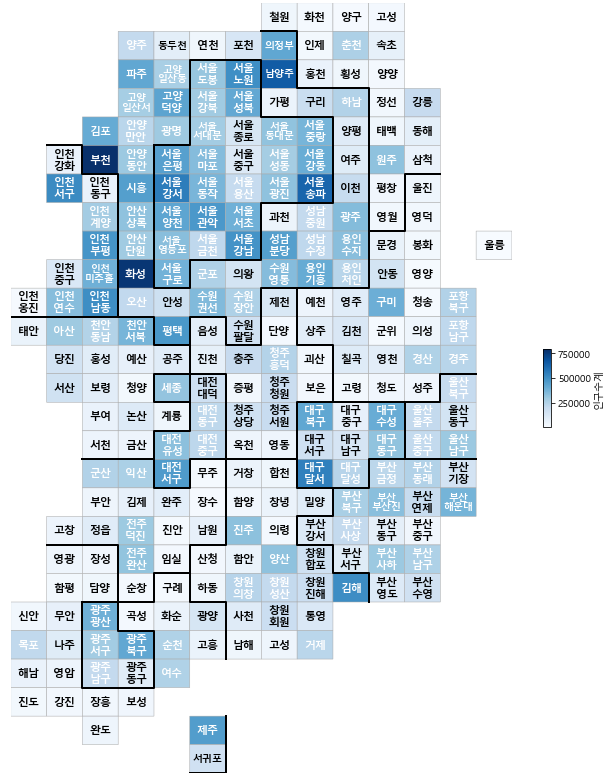

In [397]:
drawKorea('인구수계',pop,'Blues')

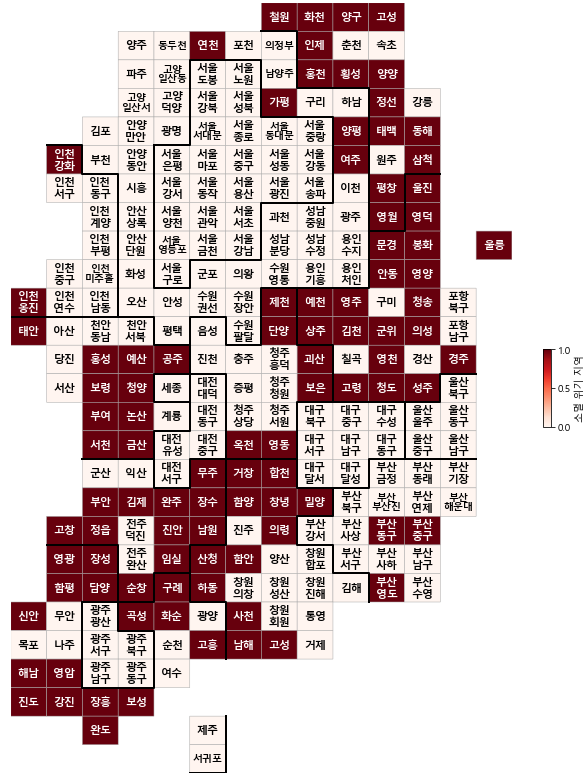

In [400]:
pop['소멸 위기 지역'] = [ 1 if con else 0 for con in pop['소멸 위기 지역'] ]
drawKorea('소멸 위기 지역',pop,'Reds')

## 표현하고자 하는 값에 음수가 있을 경우 처리해주기 위해 함수 수정
- np.abs

In [402]:
def drawKoreaMinus(targetData, blockedMap, cmapname):
    gamma = 0.75
    whitelabelmin = 20.
    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 띄어쓰기를 \n로 바꾸기.
        if len(row.ID.split())==2:
            dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
        elif row.ID[:2]=='고성':
            dispname = '고성'
        else:
            dispname = row.ID

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

# 여성인구 비율

In [403]:
pop['여성비'] = (pop['인구수여자']/pop['인구수계'] - 0.5) * 100

# 왜 0.5를 빼는가?
- 이렇게 하면 비율이 0.5(여성인구 50%)이면 0으로 나오고, 0.49(49%)면 -0.01로 나옴
왜 0.5를 빼는가?
- 이렇게 하면 비율이 0.5(여성인구 50%)이면 0으로 나오고, 0.49(49%)면 -0.01로 나옴
- RuBu는 0을 기준으로 파란색과 빨간색이 나뉘어지기 때문에 여성비가 높은 곳, 낮은 곳을 색으로 구분할 수 있음

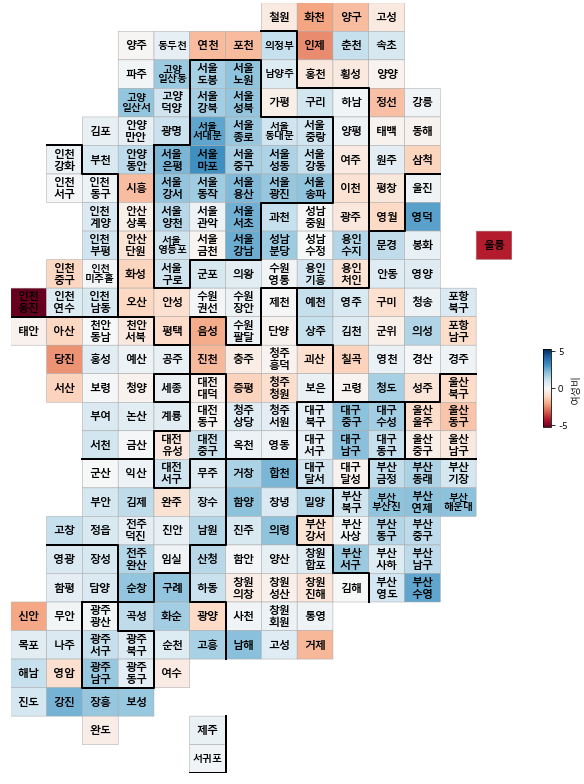

In [405]:
drawKoreaMinus('여성비',pop,'RdBu')

# 2030세대(남자+여자 합계) 중 여성인구 비율

In [412]:
pop['2030여성비'] = (pop['20~39세여자']/pop['20~39세계'] - 0.5) * 100

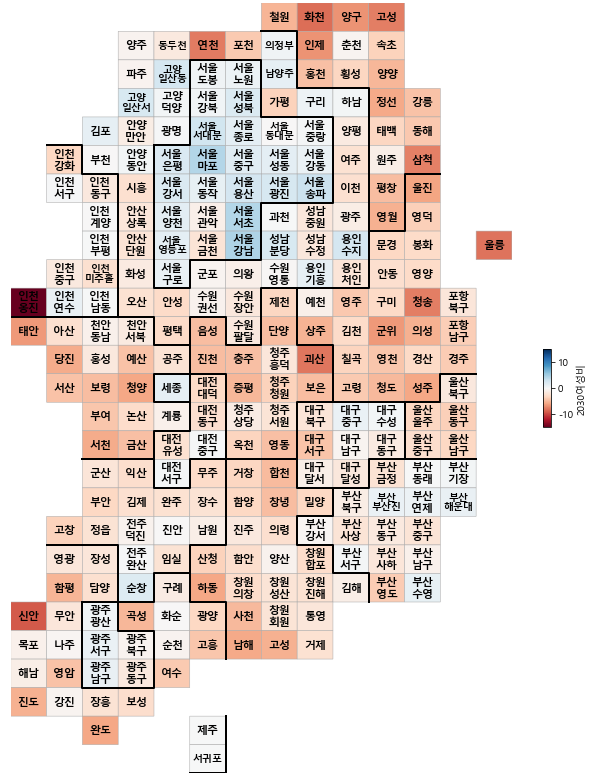

In [413]:
drawKoreaMinus('2030여성비',pop,'RdBu')

# Folium에서 인구 소멸 위기 지역 표현하기

In [416]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20~39세계,20~39세여자,65세 이상계,인구수계,인구수남자,인구수여자,소멸 비율,소멸 위기 지역,y_x,x_x,y_y,x_y,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,,,,,
강릉,강원,강릉시,46008,20993,40497,203057,101154,101903,0.518384,0,3,11,3,11,3,11,0.184431,-4.370979
고성(강원),강원,고성군,4006,1699,7005,23621,11933,11688,0.242541,1,0,10,0,10,0,10,-0.518606,-7.588617
동해,강원,동해시,16311,7510,16152,83888,42093,41795,0.464958,1,4,11,4,11,4,11,-0.177618,-3.957452
삼척,강원,삼척시,12428,5280,14953,61833,31630,30203,0.353106,1,5,11,5,11,5,11,-1.153915,-7.515288
속초,강원,속초시,15928,7411,14010,76302,37488,38814,0.528979,0,1,10,1,10,1,10,0.868916,-3.471873


In [417]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

## 전국 인구수

In [422]:
geo_path = './source/전국 경계선 JSon.json'
get_data = json.load(open(geo_path, encoding='utf8'))

mapping = folium.Map( [36.2002 , 127.054], zoom_start = 7)
mapping.choropleth(geo_data = get_data,
                    data = pop_folium['인구수계'],
                    columns = [pop_folium.index, pop_folium['인구수계']],
                    fill_color = 'YlGnBu',
                    key_on = 'id')
mapping

## 소멸 위기 지역

In [423]:
geo_path = './source/전국 경계선 JSon.json'
get_data = json.load(open(geo_path, encoding='utf8'))

mapping = folium.Map( [36.2002 , 127.054], zoom_start = 7)
mapping.choropleth(geo_data = get_data,
                    data = pop_folium['소멸 위기 지역'],
                    columns = [pop_folium.index, pop_folium['소멸 위기 지역']],
                    fill_color = 'PuRd',
                    key_on = 'id')
mapping